# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [262]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [263]:
df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [264]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [265]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [266]:
df_train.shape

(15223, 52)

In [267]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [268]:
df_test.shape

(14910, 52)

In [269]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [270]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [271]:
df = df_test.append(df_train).reset_index(drop=True)

In [272]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [274]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Среднее', 'Высшее', 'Неполное среднее', 'Неоконченное высшее', 'Среднее специальное', 'Два и более высших образования', 'Ученая степень'}


MARITAL_STATUS
{'Разведен(а)', 'Состою в браке', 'Гражданский брак', 'Не состоял в браке', 'Вдовец/Вдова'}


GEN_INDUSTRY
{nan, 'Наука', 'Управляющая компания', 'Юридические услуги/нотариальные услуги', 'Подбор персонала', 'Информационные услуги', 'Государственная служба', 'Ресторанный бизнес/Общественное питание', 'Сборочные производства', 'Сельское хозяйство', 'Маркетинг', 'Торговля', 'ЧОП/Детективная д-ть', 'Здравоохранение', 'Другие сферы', 'Логистика', 'Банк/Финансы', 'Недвижимость', 'Туризм', 'Информационные технологии', 'Транспорт', 'СМИ/Реклама/PR-агенства', 'Нефтегазовая промышленность', 'Салоны красоты и здоровья', 'Строительство', 'Развлечения/Искусство', 'Энергетика', 'Металлургия/Промышленность/Машиностроение', 'Коммунальное хоз-во/Дорожные службы', 'Страхование', 'Образование', 'Химия/Парфюмерия/Фармацевтика'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [275]:
df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

0         7000.0
1         4100.0
2        40000.0
3        20000.0
4        17000.0
5         7000.0
6        10000.0
7         7500.0
8         9000.0
9         4000.0
10       15000.0
11       12000.0
12        8000.0
13       20000.0
14       18500.0
15       14000.0
16        6000.0
17        9000.0
18        5000.0
19       15000.0
20        6100.0
21       22180.0
22        9000.0
23        8700.0
24        7000.0
25        6000.0
26       15000.0
27       12000.0
28       11000.0
29        8000.0
          ...   
30103    12000.0
30104    10000.0
30105    10000.0
30106     8000.0
30107    11000.0
30108     7000.0
30109    10000.0
30110     8000.0
30111    25000.0
30112    10000.0
30113    12000.0
30114     7000.0
30115    12000.0
30116    14500.0
30117    12000.0
30118     8000.0
30119     7000.0
30120    10000.0
30121    10000.0
30122    10000.0
30123    15000.0
30124     8100.0
30125     9500.0
30126    13000.0
30127    10000.0
30128    12000.0
30129    10000.0
30130     6000

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

In [276]:
"""
Да, пропуски есть. 
GEN_INDUSTRY, GEN_TITLE, ORG_TP_STATE, ORG_TP_FCAPITAL, JOB_DIR, TP_PROVINCE, REGION_NM удалить
Для WORK_TIME и PREVIOUS_CARD_NUM_UTILIZED заполнить пропуски нулями.
Учитывая, что максимальная сумма просрочки коррелирует средней, то максимальную можно удалить совсем
(если не удалять, это всё равно не повлияет на конечные оценки :).
"""

'\nДа, пропуски есть. \nGEN_INDUSTRY, GEN_TITLE, ORG_TP_STATE, ORG_TP_FCAPITAL, JOB_DIR, TP_PROVINCE, REGION_NM удалить\nДля WORK_TIME и PREVIOUS_CARD_NUM_UTILIZED заполнить пропуски нулями.\nУчитывая, что максимальная сумма просрочки коррелирует средней, то максимальную можно удалить совсем\n(если не удалять, это всё равно не повлияет на конечные оценки :).\n'

#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

In [277]:
"""
Есть, применим к ним dummy-кодирование
"""

'\nЕсть, применим к ним dummy-кодирование\n'

#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [278]:
def preproc_data(df_input):
    df_output = df_input.copy()
    
    # удаляем идентификатор AGREEMENT_RK 
    df_output = df_output.drop([
        'AGREEMENT_RK',    
        'ORG_TP_STATE', 
        'ORG_TP_FCAPITAL',         
        'TP_PROVINCE',
        'REG_ADDRESS_PROVINCE',
        'FACT_ADDRESS_PROVINCE',
        'POSTAL_ADDRESS_PROVINCE',
        'TP_PROVINCE',
        'REGION_NM',
        'LOAN_MAX_DLQ_AMT',
        'PREVIOUS_CARD_NUM_UTILIZED'
    ], axis=1)    
    
    # избавляемся от проблем с '.' и ','
    for column_name in ['PERSONAL_INCOME', 'CREDIT', 'FST_PAYMENT', 'LOAN_AVG_DLQ_AMT']:    
        df_output[column_name] = df_output[column_name].map(lambda x: x.replace(',', '.')).astype('float')
    

    # заполняем пропуски
    # df_output['PREVIOUS_CARD_NUM_UTILIZED'] = df_output['PREVIOUS_CARD_NUM_UTILIZED'].fillna(0)
    # df_output['PREVIOUS_CARD_NUM_UTILIZED'] = df_output['PREVIOUS_CARD_NUM_UTILIZED'].map(lambda x: 1 if x != 0 else x)
    # p.s. Данных в PREVIOUS_CARD_NUM_UTILIZED слишком мало, чтобы учитывать.
    # В идеале их лучше бы удалить совсем.
    # Однако в рамках данной задачи их удаление не повлияет на результат :) 
    df_output['WORK_TIME'] = df_output['WORK_TIME'].fillna(0)
   
    # кодируем категориальные признаки. Пропуски указываем отдельно.
    df_output = pd.get_dummies(df_output, dummy_na = True,  columns=[
        'EDUCATION',
        'MARITAL_STATUS',
        'FAMILY_INCOME',
        'GEN_INDUSTRY', 
        'GEN_TITLE',
        'JOB_DIR'
    ])
        
    return df_output

In [279]:
df_preproc = df.pipe(preproc_data)

df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

In [280]:
# что получилось после очистки
df_train_preproc.info(), df_test_preproc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15223 entries, 14910 to 30132
Columns: 112 entries, TARGET to JOB_DIR_nan
dtypes: float64(5), int64(31), uint8(76)
memory usage: 5.4 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 14910 entries, 0 to 14909
Columns: 112 entries, TARGET to JOB_DIR_nan
dtypes: float64(5), int64(31), uint8(76)
memory usage: 5.3 MB


(None, None)

#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [281]:
y1 = df_train_preproc['TARGET']
y1_test = df_test_preproc['TARGET']
X1 = df_train_preproc.drop(['TARGET'], axis=1)
x1_test = df_test_preproc.drop(['TARGET'], axis=1)
X1.shape, x1_test.shape

((15223, 111), (14910, 111))

#### Задание 5. Обучение и оценка качества разных моделей

In [282]:
from sklearn.cross_validation import train_test_split
# test_size=0.3, random_state=42

X, X_test, y, y_test = train_test_split(
    X1, 
    y1, 
    test_size=0.3, 
    random_state=42)

X.shape, X_test.shape

((10656, 111), (4567, 111))

In [283]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
# Постепенно мы узнаем, что они делают а сейчас учимся понимать какой работает качественнее
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

dtc = DecisionTreeClassifier()

dtc.fit(X, y)
predict_dtc = dtc.predict(X_test)
predict_proba_dtc=dtc.predict_proba(X_test)

rfc = RandomForestClassifier()
rfc.fit(X, y)
predict_rfc = rfc.predict(X_test)
predict_proba_rfc=rfc.predict_proba(X_test)

lr = LogisticRegression()
lr.fit(X, y)
predict_lr = lr.predict(X_test)
predict_proba_lr=lr.predict_proba(X_test)

predict_dtc, predict_rfc, predict_lr

(array([1, 1, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]))

In [284]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score, precision_recall_curve, classification_report

pr_dtc = precision_score(y_test, predict_dtc)
rc_dtc = recall_score(y_test, predict_dtc)
as_dtc = accuracy_score(y_test, predict_dtc)

pr_rfc = precision_score(y_test, predict_rfc)
rc_rfc = recall_score(y_test, predict_rfc)
as_rfc = accuracy_score(y_test, predict_rfc)

pr_lr = precision_score(y_test, predict_lr)
rc_lr = recall_score(y_test, predict_lr)
as_lr = accuracy_score(y_test, predict_lr)

print('precision {:.2f}'.format(pr_dtc))
print('recall {:.2f}'.format(rc_dtc))
print('accuracy {:.2f}'.format(as_dtc))
print('----------------------------------')
print('----------------------------------')

print('precision {:.2f}'.format(pr_rfc))
print('recall {:.2f}'.format(rc_rfc))
print('accuracy {:.2f}'.format(as_rfc))
print('----------------------------------')
print('----------------------------------')

print('precision {:.2f}'.format(pr_lr))
print('recall {:.2f}'.format(rc_lr))
print('accuracy {:.2f}'.format(as_lr))


precision 0.17
recall 0.19
accuracy 0.79
----------------------------------
----------------------------------
precision 0.27
recall 0.01
accuracy 0.88
----------------------------------
----------------------------------
precision 0.25
recall 0.00
accuracy 0.88


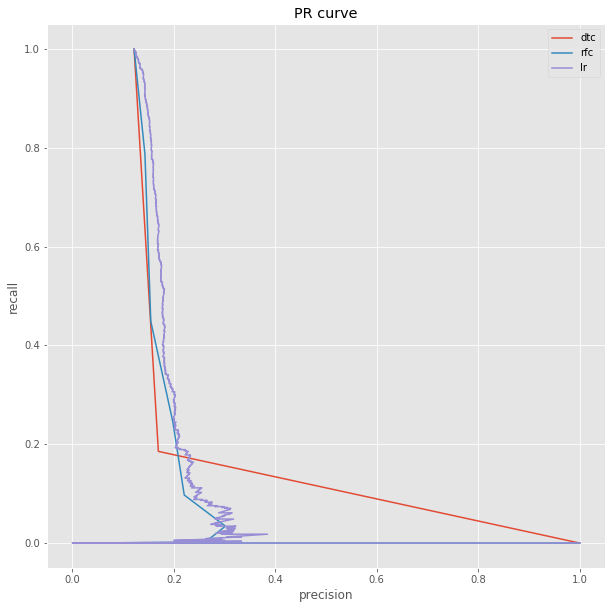

In [285]:
# с нашими результатми в кредитах мы откажем всем :)

# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально сравнить)
# Возможно вас удивит качество! Но задача подобрана специально ;) Такое качество тоже бывает

pr_dtc, rc_dtc, th_dtc = precision_recall_curve(y_test, predict_proba_dtc[:,1])
pr_rfc, rc_rfc, th_rfc = precision_recall_curve(y_test, predict_proba_rfc[:,1])
pr_lr, rc_lr, th_lr = precision_recall_curve(y_test, predict_proba_lr[:,1])
plt.figure(figsize=(10,10))
plt.plot(pr_dtc, rc_dtc, label = 'dtc')
plt.plot(pr_rfc, rc_rfc, label = 'rfc')
plt.plot(pr_lr, rc_lr, label = 'lr')
plt.xlabel('precision')
plt.ylabel('recall')
plt.grid(True)
plt.title('PR curve')
plt.legend()

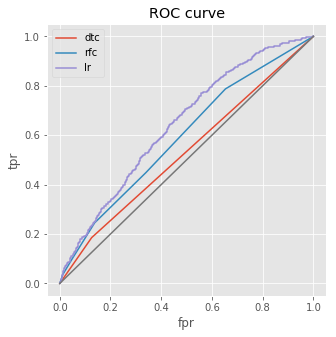

In [286]:
# Потроить roc-кривые всех моделей на одном графике
# Вывести roc_auc каждой модели
# Подпишите оси и линии

from sklearn.metrics import roc_auc_score, roc_curve

fpr_dtc, tpr_dtc, th_dtc = roc_curve(y_test, predict_proba_dtc[:,1])
fpr_rfc, tpr_rfc, th_rfc = roc_curve(y_test, predict_proba_rfc[:,1])
fpr_lr, tpr_lr, th_lr = roc_curve(y_test, predict_proba_lr[:,1])
plt.figure(figsize=(5,5))
plt.plot(fpr_dtc, tpr_dtc, label = 'dtc')
plt.plot(fpr_rfc, tpr_rfc, label = 'rfc')
plt.plot(fpr_lr, tpr_lr, label = 'lr')
plt.plot([0,1],[0,1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.legend()

In [287]:
roc_auc_score(y_test, predict_proba_dtc[:,1]), roc_auc_score(y_test, predict_proba_rfc[:,1]), roc_auc_score(y_test, predict_proba_lr[:,1])

(0.5298566013670699, 0.5917841071380454, 0.6423059649879191)

In [288]:
# Кажется для данной задачи использовать первые две модели не следует. lr лучше всех, то тоже так себе
# Игра с параметрами "черных ящиков" тоже не дала каких-либо значимых результатов

In [289]:
from sklearn.cross_validation import cross_val_score
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc

cv_dtc = cross_val_score(
    dtc, 
    X1,
    y1,
    scoring='roc_auc',
    cv=10
)
cv_dtc

array([0.54082393, 0.5058059 , 0.51904656, 0.51665698, 0.55406001,
       0.52621528, 0.52141965, 0.5112001 , 0.52635124, 0.53538425])

In [290]:
cv_dtc.mean() # roc_auc

0.5256963919232651

In [291]:
cv_rfc = cross_val_score(
    rfc, 
    X1,
    y1,
    scoring='roc_auc',
    cv=10
)
cv_rfc.mean()

0.5805984903639984

In [292]:
cv_lr = cross_val_score(
    lr, 
    X1,
    y1,
    scoring='roc_auc',
    cv=10
)
cv_lr.mean()

0.637530982201761

In [293]:
"""
Если поиграться с данными, удалить больше параметров или наоборот, 
категоризировать по городам, лучше не становится. 
Кросс-валидация подтверждает, что результат на разных частях данных одинаково плох
"""

'\nЕсли поиграться с данными, удалить больше параметров или наоборот, \nкатегоризировать по городам, лучше не становится. \nКросс-валидация подтверждает, что результат на разных частях данных одинаково плох\n'

In [294]:
# Взять лучшую модель и сделать предсказания (с вероятностями (!!!)) для test выборки
predict = lr.predict(x1_test)
predict_proba = lr.predict_proba(x1_test) 

In [295]:
print( classification_report(y1_test, predict))

             precision    recall  f1-score   support

          0       0.88      1.00      0.94     13160
          1       0.23      0.00      0.00      1750

avg / total       0.81      0.88      0.83     14910



roc_auc = 0.62


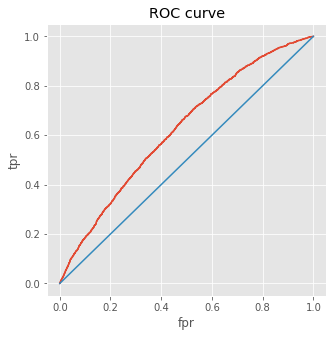

In [296]:
# Померить roc_auc на тесте
# Вывести текстом и на графике =)

fpr, tpr, th = roc_curve(y1_test, predict_proba[:,1])
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label = 'predict')
plt.plot([0,1],[0,1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')

print('roc_auc = {:.2f}'.format(roc_auc_score(y1_test, predict_proba[:,1])))

### Больше обязательных заданий нет, но ниже вы можете провести исследование, поиграться с данными
### Это возможность написать код, который я посмотрю и в случае чего откомметирую. ;)
### Это не оценивается и остается на ваше усмотрение. Просто дополнительная возможность

In [297]:
### И далее ;) А далее игра с данными и проба еще одной модели

In [298]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

df = df_test.append(df_train).reset_index(drop=True)

df.shape

(30133, 53)

In [299]:
df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


In [300]:
def preproc_data(df_input):
    df_output = df_input.copy()
    
    # удаляем идентификатор AGREEMENT_RK
    df_output = df_output.drop([
        'AGREEMENT_RK',    
        'ORG_TP_STATE', 
        'ORG_TP_FCAPITAL',         
        'TP_PROVINCE',
        'REG_ADDRESS_PROVINCE',
        'FACT_ADDRESS_PROVINCE',
        'POSTAL_ADDRESS_PROVINCE',
        'TP_PROVINCE',
        'REGION_NM',
        'LOAN_MAX_DLQ_AMT',
        'PREVIOUS_CARD_NUM_UTILIZED',
        'SOCSTATUS_WORK_FL',
        'SOCSTATUS_PENS_FL',
        'REG_FACT_FL',
        'FACT_POST_FL',
        'REG_POST_FL',
        'REG_FACT_POST_TP_FL',
        'DL_DOCUMENT_FL',
        'LOAN_MAX_DLQ',
        'GEN_INDUSTRY',
        'LOAN_NUM_PAYM',
        'REG_PHONE_FL',
        'GEN_PHONE_FL',
        'FACT_LIVING_TERM',
        'DL_DOCUMENT_FL',
        'GPF_DOCUMENT_FL',
        'JOB_DIR',
        'GEN_TITLE'
    ], axis=1)    
    
    # избавляемся от проблем с '.' и ','
    for column_name in ['PERSONAL_INCOME', 'CREDIT', 'FST_PAYMENT', 'LOAN_AVG_DLQ_AMT']:    
        df_output[column_name] = df_output[column_name].map(lambda x: x.replace(',', '.')).astype('float')
    

    # заполняем пропуски

    df_output['WORK_TIME'] = df_output['WORK_TIME'].fillna(0)
   
    # кодируем категориальные признаки. Пропуски указываем отдельно.
    df_output = pd.get_dummies(df_output, dummy_na = True,  columns=[
        'EDUCATION',
        'MARITAL_STATUS',
        'FAMILY_INCOME'
    ])
        
    return df_output

df_preproc = df.pipe(preproc_data)

df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

# что получилось после очистки
df_train_preproc.info(), df_test_preproc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15223 entries, 14910 to 30132
Data columns (total 43 columns):
TARGET                                      15223 non-null int64
AGE                                         15223 non-null int64
GENDER                                      15223 non-null int64
CHILD_TOTAL                                 15223 non-null int64
DEPENDANTS                                  15223 non-null int64
PERSONAL_INCOME                             15223 non-null float64
REG_FACT_POST_FL                            15223 non-null int64
FL_PRESENCE_FL                              15223 non-null int64
OWN_AUTO                                    15223 non-null int64
AUTO_RUS_FL                                 15223 non-null int64
HS_PRESENCE_FL                              15223 non-null int64
COT_PRESENCE_FL                             15223 non-null int64
GAR_PRESENCE_FL                             15223 non-null int64
LAND_PRESENCE_FL                        

(None, None)

In [301]:
y1 = df_train_preproc['TARGET']
y1_test = df_test_preproc['TARGET']
X1 = df_train_preproc.drop(['TARGET'], axis=1)
x1_test = df_test_preproc.drop(['TARGET'], axis=1)
X1.shape, x1_test.shape

X, X_test, y, y_test = train_test_split(
    X1, 
    y1, 
    test_size=0.3, 
    random_state=42)

X.shape, X_test.shape

((10656, 42), (4567, 42))

In [302]:
dtc = DecisionTreeClassifier()
dtc.fit(X, y)
predict_dtc = dtc.predict(X_test)
predict_proba_dtc=dtc.predict_proba(X_test)

rfc = RandomForestClassifier()
rfc.fit(X, y)
predict_rfc = rfc.predict(X_test)
predict_proba_rfc=rfc.predict_proba(X_test)

lr = LogisticRegression()
lr.fit(X, y)
predict_lr = lr.predict(X_test)
predict_proba_lr=lr.predict_proba(X_test)

print('accuracy score for dtc {:.2f}, rfc {:.2f}, lr {:.2f}'.format(
    accuracy_score(y_test, predict_dtc), 
    accuracy_score(y_test, predict_rfc),
    accuracy_score(y_test, predict_lr)))
print('dtc', classification_report(y_test, predict_dtc))
print('rfc', classification_report(y_test, predict_rfc))
print('lr', classification_report(y_test, predict_lr))

accuracy score for dtc 0.79, rfc 0.87, lr 0.88
dtc              precision    recall  f1-score   support

          0       0.88      0.87      0.88      4012
          1       0.16      0.18      0.17       555

avg / total       0.80      0.79      0.79      4567

rfc              precision    recall  f1-score   support

          0       0.88      0.99      0.93      4012
          1       0.23      0.01      0.02       555

avg / total       0.80      0.87      0.82      4567

lr              precision    recall  f1-score   support

          0       0.88      1.00      0.94      4012
          1       0.25      0.00      0.00       555

avg / total       0.80      0.88      0.82      4567



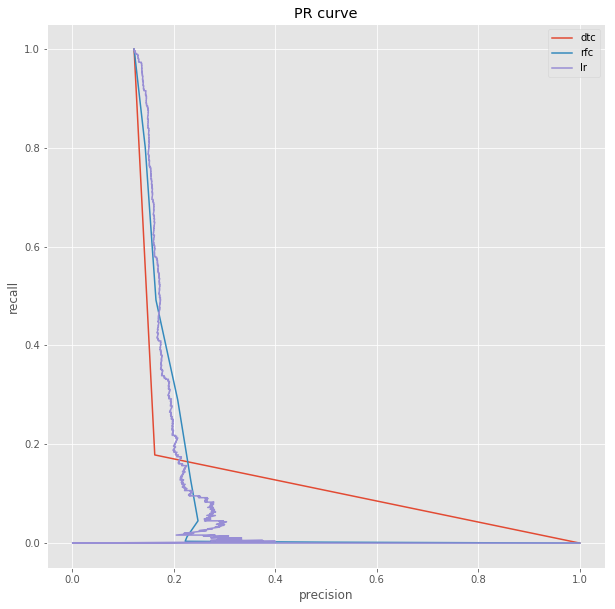

In [303]:
pr_dtc, rc_dtc, th_dtc = precision_recall_curve(y_test, predict_proba_dtc[:,1])
pr_rfc, rc_rfc, th_rfc = precision_recall_curve(y_test, predict_proba_rfc[:,1])
pr_lr, rc_lr, th_lr = precision_recall_curve(y_test, predict_proba_lr[:,1])
plt.figure(figsize=(10,10))
plt.plot(pr_dtc, rc_dtc, label = 'dtc')
plt.plot(pr_rfc, rc_rfc, label = 'rfc')
plt.plot(pr_lr, rc_lr, label = 'lr')
plt.xlabel('precision')
plt.ylabel('recall')
plt.grid(True)
plt.title('PR curve')
plt.legend()

(0.5255052410336557, 0.6080380480181078, 0.6312526384809536)

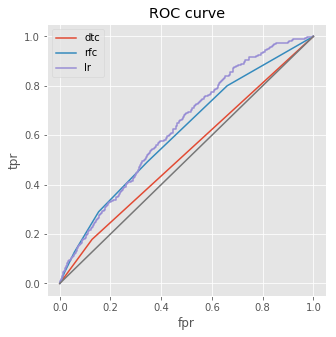

In [304]:
fpr_dtc, tpr_dtc, th_dtc = roc_curve(y_test, predict_proba_dtc[:,1])
fpr_rfc, tpr_rfc, th_rfc = roc_curve(y_test, predict_proba_rfc[:,1])
fpr_lr, tpr_lr, th_lr = roc_curve(y_test, predict_proba_lr[:,1])
plt.figure(figsize=(5,5))
plt.plot(fpr_dtc, tpr_dtc, label = 'dtc')
plt.plot(fpr_rfc, tpr_rfc, label = 'rfc')
plt.plot(fpr_lr, tpr_lr, label = 'lr')
plt.plot([0,1],[0,1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.legend()

roc_auc_score(y_test, predict_proba_dtc[:,1]), roc_auc_score(y_test, predict_proba_rfc[:,1]), roc_auc_score(y_test, predict_proba_lr[:,1])

In [305]:
cv_dtc = cross_val_score(
    dtc, 
    X1,
    y1,
    scoring='roc_auc',
    cv=10
)
cv_rfc = cross_val_score(
    rfc, 
    X1,
    y1,
    scoring='roc_auc',
    cv=10
)
cv_lr = cross_val_score(
    lr, 
    X1,
    y1,
    scoring='roc_auc',
    cv=10
)
cv_dtc.mean(), cv_rfc.mean(), cv_lr.mean()

(0.5270398832439704, 0.5934285903660274, 0.6339024924026737)

precision 0.00
recall 0.00
accuracy 0.88
roc_auc = 0.62


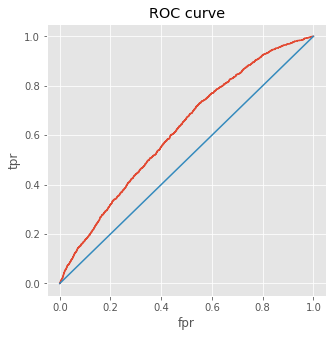

In [306]:
predict = lr.predict(x1_test)
predict_proba = lr.predict_proba(x1_test) 

print('precision {:.2f}'.format(precision_score(y1_test, predict)))
print('recall {:.2f}'.format(recall_score(y1_test, predict)))
print('accuracy {:.2f}'.format(accuracy_score(y1_test, predict)))

# Померить roc_auc на тесте
# Вывести текстом и на графике =)

fpr, tpr, th = roc_curve(y1_test, predict_proba[:,1])
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label = 'predict')
plt.plot([0,1],[0,1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
print('roc_auc = {:.2f}'.format(roc_auc_score(y1_test, predict_proba[:,1])))

# другие модели

In [307]:
import sys
!{sys.executable} -m pip install xgboost

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [308]:
import xgboost

In [309]:
X, X_test, y, y_test = train_test_split(
    X1, 
    y1, 
    test_size=0.3, 
    random_state=42)

In [310]:
X.shape, len(y)

((10656, 42), 10656)

In [311]:
X_test.shape, len(y_test)

((4567, 42), 4567)

In [312]:
xgb = xgboost.XGBClassifier()

In [313]:
xgb.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [314]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4567 entries, 21229 to 25279
Data columns (total 42 columns):
AGE                                         4567 non-null int64
GENDER                                      4567 non-null int64
CHILD_TOTAL                                 4567 non-null int64
DEPENDANTS                                  4567 non-null int64
PERSONAL_INCOME                             4567 non-null float64
REG_FACT_POST_FL                            4567 non-null int64
FL_PRESENCE_FL                              4567 non-null int64
OWN_AUTO                                    4567 non-null int64
AUTO_RUS_FL                                 4567 non-null int64
HS_PRESENCE_FL                              4567 non-null int64
COT_PRESENCE_FL                             4567 non-null int64
GAR_PRESENCE_FL                             4567 non-null int64
LAND_PRESENCE_FL                            4567 non-null int64
CREDIT                                      4567 non-n

In [315]:
predict_xgb = xgb.predict(X_test)

/Users/Vitalina/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [316]:
predict_proba_xgb=xgb.predict_proba(X_test)
predict_proba_xgb

array([[0.6753056 , 0.32469437],
       [0.85563767, 0.14436235],
       [0.7752991 , 0.22470096],
       ...,
       [0.93372804, 0.06627194],
       [0.85820943, 0.14179055],
       [0.95849663, 0.04150338]], dtype=float32)

In [317]:
cv_xgb = cross_val_score(
    xgb, 
    X1,
    y1,
    scoring='roc_auc',
    cv=10
)
cv_xgb

array([0.63892665, 0.66220878, 0.69578446, 0.66361172, 0.68646924,
       0.68530947, 0.65390922, 0.69084875, 0.6753227 , 0.68365325])

In [318]:
cv_xgb.mean() # чуточку лучше, чем остальные модели

0.6736044234896894

/Users/Vitalina/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


precision 0.30
recall 0.00
accuracy 0.88
roc_auc = 0.69


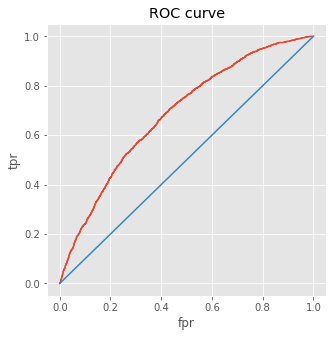

In [319]:
predict = xgb.predict(x1_test)
predict_proba = xgb.predict_proba(x1_test) 

print('precision {:.2f}'.format(precision_score(y1_test, predict)))
print('recall {:.2f}'.format(recall_score(y1_test, predict)))
print('accuracy {:.2f}'.format(accuracy_score(y1_test, predict)))

fpr, tpr, th = roc_curve(y1_test, predict_proba[:,1])
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label = 'predict')
plt.plot([0,1],[0,1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
print('roc_auc = {:.2f}'.format(roc_auc_score(y1_test, predict_proba[:,1])))

In [320]:
my_df = pd.DataFrame()
my_df['target'] = y1_test
my_df['new'] = predict

my_df

,target,new
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,1,0


In [321]:
unique, counts = np.unique(predict, return_counts=True)
dict(zip(unique, counts))

{0: 14900, 1: 10}

In [322]:
data_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')
data_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')
data_all = data_train.append(data_test).reset_index(drop=True)

In [323]:
data_process = data_all.pipe(preproc_data)
data_process.columns

Index(['TARGET', 'AGE', 'GENDER', 'CHILD_TOTAL', 'DEPENDANTS',
       'PERSONAL_INCOME', 'REG_FACT_POST_FL', 'FL_PRESENCE_FL', 'OWN_AUTO',
       'AUTO_RUS_FL', 'HS_PRESENCE_FL', 'COT_PRESENCE_FL', 'GAR_PRESENCE_FL',
       'LAND_PRESENCE_FL', 'CREDIT', 'TERM', 'FST_PAYMENT', 'WORK_TIME',
       'FACT_PHONE_FL', 'LOAN_NUM_TOTAL', 'LOAN_NUM_CLOSED', 'LOAN_DLQ_NUM',
       'LOAN_AVG_DLQ_AMT', 'EDUCATION_Высшее',
       'EDUCATION_Два и более высших образования',
       'EDUCATION_Неоконченное высшее', 'EDUCATION_Неполное среднее',
       'EDUCATION_Среднее', 'EDUCATION_Среднее специальное',
       'EDUCATION_Ученая степень', 'EDUCATION_nan',
       'MARITAL_STATUS_Вдовец/Вдова', 'MARITAL_STATUS_Гражданский брак',
       'MARITAL_STATUS_Не состоял в браке', 'MARITAL_STATUS_Разведен(а)',
       'MARITAL_STATUS_Состою в браке', 'MARITAL_STATUS_nan',
       'FAMILY_INCOME_до 5000 руб.', 'FAMILY_INCOME_от 10000 до 20000 руб.',
       'FAMILY_INCOME_от 20000 до 50000 руб.',
       'FAMILY_INCO

In [324]:
all_target = data_process['TARGET']
all_data = data_process.drop(['TARGET'], axis=1)

data_train, data_test, target_train, target_test = train_test_split(
    all_data, 
    all_target, 
    test_size=0.3, 
    random_state=42)

xgb = xgboost.XGBClassifier(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 20, alpha = 10, n_estimators = 25)
xgb.fit(data_train, target_train)
predictions = xgb.predict(data_test)

unique, counts = np.unique(predictions, return_counts=True)
print("Predictions", dict(zip(unique, counts)))

unique, counts = np.unique(target_test, return_counts=True)
print("Target test", dict(zip(unique, counts)))

unique, counts = np.unique(target_train, return_counts=True)
print("Target train", dict(zip(unique, counts)))

#accuracy = accuracy_score(target_test, predictions)
#print("Accuracy: %.2f%%" % (accuracy * 100.0))

Predictions {0: 9033, 1: 7}
Target test {0: 7948, 1: 1092}
Target train {0: 18623, 1: 2470}


/Users/Vitalina/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
